# Atividade: *Perceptron* - Petróleo

**INSTITUTO FEDERAL DE MINAS GERAIS**

*Departamento de Engenharia e Computação*   

*Professor: Ciniro Nametala Leite*

*Aluno: Luan Carlos dos Santos*

---

### Pacotes necessários

In [39]:
import numpy as np
import pandas as pd
import pygwalker as pyg
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns
import plotly.graph_objects as go


---

### Funções

   - Degrau Bipolar

In [40]:
def degrau_bipolar(u):
   if u >= 0:
      y = 1 # óleo P1
   else:
      y = -1 # óleo P2
   return y

   - Previsão

In [41]:
def previsao(w, x):
   u = np.dot(w.T, x)
   yhat = degrau_bipolar(u)
   return yhat # esse y hat é a previsão da perceptron

---

### Conjunto de dados
   - Coletando os dados de treinamento;

In [42]:
dados = pd.read_csv('../data-sets/tabela_treino.csv', sep=';')
dados.head()

,Amostra,x1,x2,x3,d
0,1,-0.6508,0.1097,40.009,-1.0
1,2,-14.4920,0.8896,44.005,-1.0
2,3,2.0850,0.6876,79.845,-1.0
3,4,0.2626,11.4760,12.071,-1.0
4,5,0.6418,10.2340,77.985,1.0


   - Armazenando a quantidade de amostras;

In [43]:
n_amostras = dados.shape[0] 

   - Armazenando a quantidade de variáveis e a matriz treinamento;


In [44]:
n_variaveis = dados.shape[1] -1
x = dados.iloc[:, 1:n_variaveis].values
pd.DataFrame(x)[:5]

,0,1,2
0,-0.6508,0.1097,40.009
1,-14.4920,0.8896,44.005
2,2.0850,0.6876,79.845
3,0.2626,11.4760,12.071
4,0.6418,10.2340,77.985


   - Inserindo o Bias na matriz de treinamento;

In [45]:
# Criando um vetor preenchido com '1s' * -1
bias = np.ones((n_amostras, 1)) * -1
x = np.hstack((x, bias))
pd.DataFrame(x)[:5]

,0,1,2,3
0,-0.6508,0.1097,40.009,-1.0
1,-14.4920,0.8896,44.005,-1.0
2,2.0850,0.6876,79.845,-1.0
3,0.2626,11.4760,12.071,-1.0
4,0.6418,10.2340,77.985,-1.0


   - Armazenando o vetor de saida;

In [46]:
y = dados.iloc[:, n_variaveis].values
print(y)
print(f"Quantidade de amostras tipo P1(1): {(y == 1).sum()}")
print(f"Quantidade de amostras tipo P2(-1): {(y== -1).sum()}")

[-1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]
Quantidade de amostras tipo P1(1): 14
Quantidade de amostras tipo P2(-1): 16


   - Inicializando o vetor de pesos $w$ com valores aleatórios de 0 a 1;

In [47]:
w = np.random.uniform(0, 1, n_variaveis)
print(w)

[0.41777503 0.38344298 0.02730293 0.89111576]


### Pré configurações de Treinamento

   - Definindo a taxa de aprendizagem $η$, a tolerância e o erro médio inicial;

In [48]:
eta = 0.01
tolerancia = 0.01
erro_medio = tolerancia + 1

   - Criando um vetor de épocas, um contador e o máximo de épocas;

In [49]:
erros_epocas = []
epoca = 0
max_epocas = 800

   - Inicializando os critérios de parada do treinamento;

In [50]:
criterio_erro = True
criterio_epoca = True

## Treinamento

*"Equanto o erro for maior que a tolerância e o máximo de épocas não for atingido, o treinamento irá se repetir"*

In [51]:
n_treinamentos = 5
pesos_iniciais = []
pesos_finais = []

for treino in range(n_treinamentos):
   
   # reinicializando os pesos aleatórios
   w = np.random.uniform(0, 1, n_variaveis)
   pesos_iniciais.append(w.copy())

   # reinicia variáveis de controle
   criterio_erro = True
   criterio_epoca = True
   epoca = 0
   erros_epocas = []
   
   while criterio_erro and criterio_epoca:
      erro_atual = 0
      epoca += 1
      
      # embaralhando os indíces pra usar na rede
      indice_aleatorios = np.random.permutation(n_amostras)
      
      # para cada amostra no conjunto de amostras
      for i in range(n_amostras):
         # pegando indice_aleatorio pra amostra i
         i_amostra = indice_aleatorios[i]
         
         # capturando uma amostra da matriz de treinamento vinculada ao indice coletado do pool de indice_aleatorios
         amostra_atual = x[i_amostra,:]
         
         # calculando o potencial de ativação
         u = np.dot(w.T, amostra_atual)
         
         # obtendo previsão da rede pela Degrau Bipolar
         yhat = degrau_bipolar(u)
         
         # calculando o erro entre a previsão e o esperado
         e = y[i_amostra] - yhat
         
         # atualizando os pesos pela regra de HEBB
         w = w + ((eta * e) * amostra_atual)
         
         # acumulando os erros de de todas as amostras
         erro_atual += np.abs(e)
         
      # calcular o erro médio da época
      erro_medio = erro_atual/n_amostras
      
      # adicionando o erro medio ao vetor de erros do treinamento
      erros_epocas.append(erro_medio)
      # verificando e atualizando os critérios de parada
      criterio_erro = (erro_medio > tolerancia)
      criterio_epoca = (epoca < max_epocas) 
   pesos_finais.append(w.copy())
   # print(f'Época: {epoca}')

# Cria nomes das colunas
colunas_iniciais = [f'w{i+1}' for i in range(n_variaveis)]
colunas_finais = [f'w{i+1}' for i in range(n_variaveis)]
colunas = colunas_iniciais + colunas_finais

# Junta pesos iniciais e finais
dados = np.hstack([pesos_iniciais, pesos_finais])

# Cria coluna de treinos
treinos = [f'Treino {i+1}' for i in range(n_treinamentos)]

# Cria DataFrame simples
df_pesos = pd.DataFrame(dados, columns=colunas)
df_pesos.insert(0, 'Treino', treinos)

df_pesos


,Treino,w1,w2,w3,w4,w1,w2,w3,w4
0,Treino 1,0.409181,0.404628,0.328860,0.611560,-1.219869,2.014000,0.907320,9.491560
1,Treino 2,0.132196,0.587362,0.534989,0.824882,-0.911440,1.099894,-0.671331,9.444882
2,Treino 3,0.064892,0.685880,0.395320,0.129845,-1.300348,1.741994,-0.372920,9.729845
3,Treino 4,0.519318,0.340040,0.086245,0.418990,-0.733118,1.505954,-0.995755,9.678990
4,Treino 5,0.435415,0.389482,0.868817,0.439102,-0.698483,1.182946,0.980377,9.999102


### Análise de Convergência do Algorítmo com base no erro de cada época:

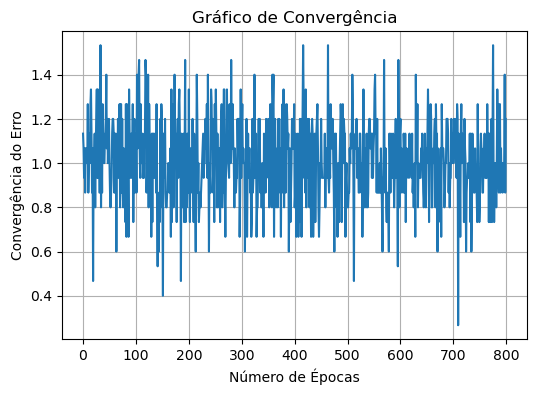

In [52]:
plt.figure(figsize=(6,4))
plt.plot((erros_epocas[:max_epocas]))
plt.title('Gráfico de Convergência')
plt.xlabel('Número de Épocas')
plt.ylabel('Convergência do Erro')
plt.grid(True)
plt.show()

   - Pesos Ideiais $w*$

In [53]:
print(f'Quantidade de épocas até convergir "{epoca}"')
#exibindo os pesos calibrados pela regra Regra de Hebb
print('Conjunto ideal de pesos em cada treinamento')
pd.DataFrame(pesos_finais)
colunas_finais = [f'w{i+1}' for i in range(n_variaveis)]
colunas = colunas_finais

# Junta pesos iniciais e finais
dados = np.hstack([pesos_finais])

# Cria DataFrame simples
df_pesos = pd.DataFrame(dados, columns=colunas)

df_pesos

Quantidade de épocas até convergir "800"
Conjunto ideal de pesos em cada treinamento


,w1,w2,w3,w4
0,-1.219869,2.014000,0.907320,9.491560
1,-0.911440,1.099894,-0.671331,9.444882
2,-1.300348,1.741994,-0.372920,9.729845
3,-0.733118,1.505954,-0.995755,9.678990
4,-0.698483,1.182946,0.980377,9.999102


   - Previsões dos Testes

In [54]:
previsoes = []

for j in range(n_treinamentos):
   # vetor que recebe as previsões da rna para o treino j
   yhat = np.zeros(n_amostras)
   
   for i in range(n_amostras):
      yhat[i] = previsao(pesos_finais[j], x[i, :])
   
   # adiciona o vetor completo de previsões à lista
   previsoes.append(yhat)
pd.DataFrame(previsoes)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Análise da Qualidade da Classificação

   - Matriz de confusão

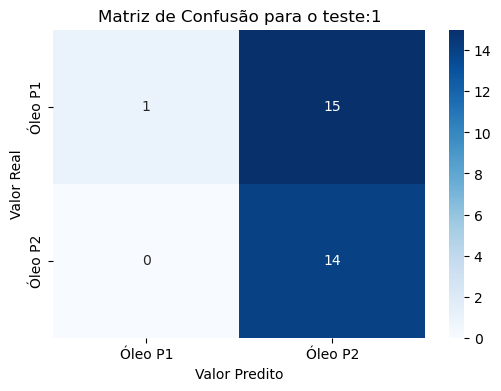

Acerto percentual do treinamento: 50.0%


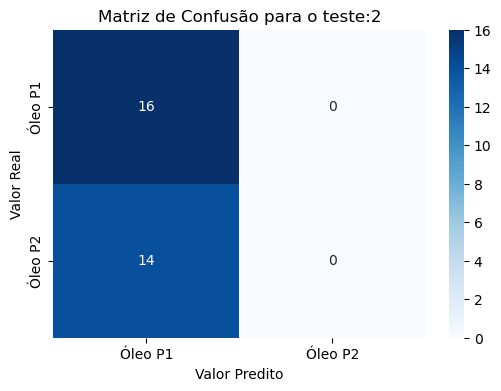

Acerto percentual do treinamento: 53.333333333333336%


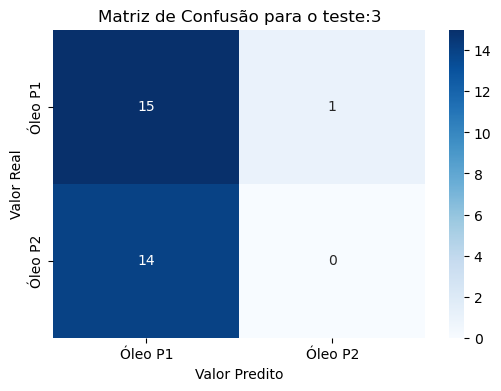

Acerto percentual do treinamento: 50.0%


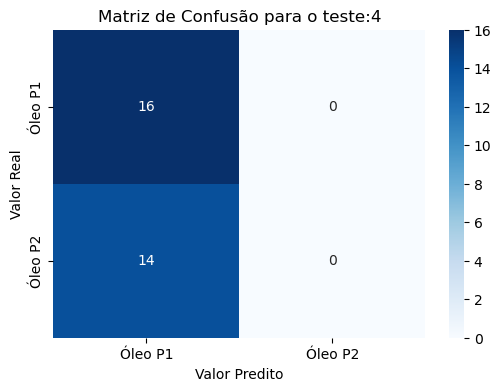

Acerto percentual do treinamento: 53.333333333333336%


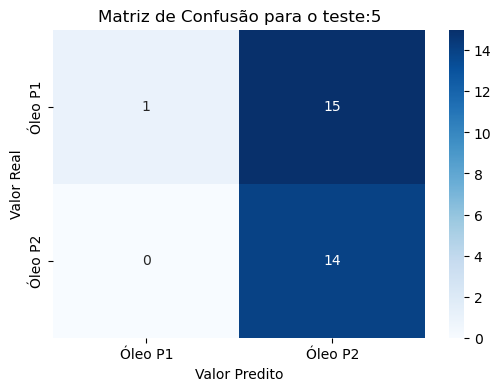

Acerto percentual do treinamento: 50.0%


In [55]:

# imprimir todas as previsões
for j, yhat in enumerate(previsoes):
    #converter -1 em 0 para melhor visualizar a matriz de confusão
   yhat_display = np.where(yhat == -1, 0, yhat)
   y_display = np.where(y == -1, 0, y)

   #gera a matriz de confusão
   cm = confusion_matrix(y_display, yhat_display)

   #plotar matriz de confusão crocante
   plt.figure(figsize=(6, 4))
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Óleo P1', 'Óleo P2'],
               yticklabels=['Óleo P1', 'Óleo P2'])
   plt.title(f'Matriz de Confusão para o teste:{j+1}')
   plt.xlabel('Valor Predito')
   plt.ylabel('Valor Real')
   plt.show()
   acuracia = (np.sum(yhat == y) / n_amostras) * 100
   print(f'Acerto percentual do treinamento: {acuracia}%')

## Implementação da rede *Perceptron*

In [56]:
# lê os dados de teste
dados_classificacao = pd.read_csv('../data-sets/tabela_classificacao.csv', sep=';', usecols=['x1', 'x2', 'x3'])
n_amostras = dados_classificacao.shape[0]
bias = np.ones((n_amostras, 1))
x_novo = np.hstack((dados_classificacao.to_numpy(), bias))


# calcula previsões para cada treino
previsoes = []
for j in range(n_treinamentos):
   yhat = np.zeros(n_amostras)
   for i in range(n_amostras):
      yhat[i] = previsao(pesos_finais[j], x_novo[i, :])
   previsoes.append(yhat)

# transforma previsões (lista de vetores linha) em array coluna por treino
previsoes = np.array(previsoes).T  # <--- TRANSPOSTO pra alinhar com as linhas do CSV

# cria DataFrame com as previsões
df_previsoes = pd.DataFrame(
    previsoes,
    columns=[f'ŷ treino {j+1}' for j in range(n_treinamentos)]
)

# junta previsões com os dados originais do teste
df_final = pd.concat([dados_classificacao.reset_index(drop=True), df_previsoes], axis=1)

# exibe a tabela final
df_final

# # --- DEBUG PERCEPTRON ---

# print("\n===== DEBUG DO PERCEPTRON =====")
# print(f"Número de amostras de teste: {n_amostras}")
# print(f"Formato da matriz de teste (x_novo): {x_novo.shape}")
# print(f"Pesos finais (último treino): {pesos_finais[-1]}")
# print(f"Bias usado no treino/teste: -1")
# print("===============================\n")

# # Mostra as 3 primeiras amostras de teste pra conferência
# print("Primeiras 3 amostras do conjunto de teste:")
# print(pd.DataFrame(x_novo[:3], columns=['x1','x2','x3','bias']))
# print("\n")

# # Vamos analisar a primeira amostra passo a passo
# amostra_teste = x_novo[0]
# print(f"Amostra 0: {amostra_teste}")

# for j, w in enumerate(pesos_finais):
#     u = np.dot(w.T, amostra_teste)
#     yhat = degrau_bipolar(u)
#     print(f"Treino {j+1}: u = {u:.4f}, ŷ = {yhat}")

# print("\n--- FIM DEBUG INDIVIDUAL ---\n")

# # --- REFAZENDO TODAS AS PREVISÕES COM LOG ---
# previsoes = []
# for j in range(n_treinamentos):
#     yhat = np.zeros(n_amostras)
#     for i in range(n_amostras):
#         u = np.dot(pesos_finais[j].T, x_novo[i, :])
#         yhat[i] = degrau_bipolar(u)
#     previsoes.append(yhat)

# previsoes = np.array(previsoes).T

# # Mostra uma amostra das previsões pra conferir
# print("Prévia das previsões (5 primeiras linhas):")
# print(pd.DataFrame(previsoes[:5], columns=[f'ŷ treino {j+1}' for j in range(n_treinamentos)]))
# print("\n")

# # Mostra o range de u (ativação) pra cada treino — ajuda a ver se está saturando
# for j in range(n_treinamentos):
#     ativacoes = np.dot(x_novo, pesos_finais[j])
#     print(f"Treino {j+1}: u min={ativacoes.min():.4f}, max={ativacoes.max():.4f}")

# # Gera o dataframe final
# df_previsoes = pd.DataFrame(
#     previsoes,
#     columns=[f'ŷ treino {j+1}' for j in range(n_treinamentos)]
# )

# df_final = pd.concat([dados_classificacao.reset_index(drop=True), df_previsoes], axis=1)
# df_final

# # Teste rápido para bias e sinais
# for b in [-1, 1]:
#     u_teste = np.dot(x_novo.copy()[:, :-1], pesos_finais[-1][:-1]) + pesos_finais[-1][-1] * b
#     print(f"\nBias de teste = {b}")
#     print("u mínimo:", u_teste.min(), " | u máximo:", u_teste.max())
#     print("Sinais ŷ:", np.unique(np.where(u_teste >= 0, 1, -1)))


,x1,x2,x3,ŷ treino 1,ŷ treino 2,ŷ treino 3,ŷ treino 4,ŷ treino 5
0,-0.3665,0.0620,5.9891,1.0,1.0,1.0,1.0,1.0
1,-0.7842,1.1267,5.5912,1.0,1.0,1.0,1.0,1.0
2,0.3012,0.5611,5.8234,1.0,1.0,1.0,1.0,1.0
3,0.7757,1.0648,8.0677,1.0,1.0,1.0,1.0,1.0
4,0.1570,0.8028,6.3040,1.0,1.0,1.0,1.0,1.0
5,-0.7014,1.0316,3.6005,1.0,1.0,1.0,1.0,1.0
6,0.3748,0.1536,6.1537,1.0,1.0,1.0,1.0,1.0
7,-0.6920,0.9404,4.4058,1.0,1.0,1.0,1.0,1.0
8,-1.3970,0.7141,4.9263,1.0,1.0,1.0,1.0,1.0
9,-1.8842,0.2805,1.2548,1.0,1.0,1.0,1.0,1.0
